<a href="https://colab.research.google.com/github/Akshay-Kumar-Arya/Identify_the_sentiments/blob/master/Complete_project_with_finetune_BERT_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_colwidth', 500)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Data path
training_data_path = "/content/gdrive/My Drive/Identify_the_sentiments/train.csv"
test_data_path =  "/content/gdrive/My Drive/Identify_the_sentiments/test.csv"

save_path = "/content/gdrive/My Drive/Identify_the_sentiments/"

In [ ]:
# reading data from csv
train_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(test_data_path)

print (train_data.shape, test_data.shape)

(7920, 3) (1953, 2)


## Text Preprocessing and visualization


**Preprocessing**
* remove url and user handles.
* remove common hashtags that do not relate to positive or negative sentiments. It removes unnecessary information.
* removing numbers and punctuations results in loss of information and give poor performance
* expansion of contractions helps in improving performance.
* bert automatically handle accents. If I convert accents into characters then it results in poor performance.

Till now: best preprocessing is 3

1. url, handles, accents, hashtags, expansion(glove100), punctuations(kept .,?').
2. url, handles, accents, hashtags, expansion(glove100).
3. url, handles, hashtags, expansion(glove100).
4. url, handles, accents, hashtags, expansion(glove100), numbers, punctuations.
5. url, handles, expansion(glove100)
6. url, handles, hashtags, expansion(glove100), emojies.


All these processing files are available in [LINK](https://drive.google.com/drive/folders/18oBvyTXBd0thfRr6V1OkFjbhZxIelO1w?usp=sharing)

In [ ]:
# removing URLs from data 
# we can also use "https[\S]*" pattern
train_data['clean_tweet'] = train_data['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
test_data['clean_tweet'] = test_data['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
# remove twitter handles
train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: re.sub("@[\w]*", '', x))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: re.sub("@[\w]*", '', x))

In [ ]:
# remove accented chars not done yet
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: remove_accented_chars(x))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: remove_accented_chars(x))

In [ ]:
  # convert to lower case because contraction correcter is uncased

train_data['clean_tweet'] = train_data['clean_tweet'].str.lower()
test_data['clean_tweet'] = test_data['clean_tweet'].str.lower()

**Are hashtags are useful words? Let's see**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [ ]:
# function to print barplot for hashtag words against their frequency.

def print_hashtags():
  # extracting hashtags from positive tweets
  HT_regular = hashtag_extract(train_data['clean_tweet'][train_data['label'] == 0])

  # extracting hashtags from Negative tweets
  HT_negative = hashtag_extract(train_data['clean_tweet'][train_data['label'] == 1])

  # unnesting list
  HT_regular = sum(HT_regular,[])
  HT_negative = sum(HT_negative,[])

  # Print top 10 #tags in positive tweets
  a = nltk.FreqDist(HT_regular)
  d = pd.DataFrame({'Hashtag': list(a.keys()),
                    'Count': list(a.values())})
  # selecting top 10 most frequent hashtags     
  d = d.nlargest(columns="Count", n = 20)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
  ax.set_title('Positive tweets')
  plt.show()


  # Print top10 hashtags in negative tweets
  b = nltk.FreqDist(HT_negative)
  e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
  # selecting top 10 most frequent hashtags
  e = e.nlargest(columns="Count", n = 20)   
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
  ax.set_title('Negative tweets')
  plt.show()

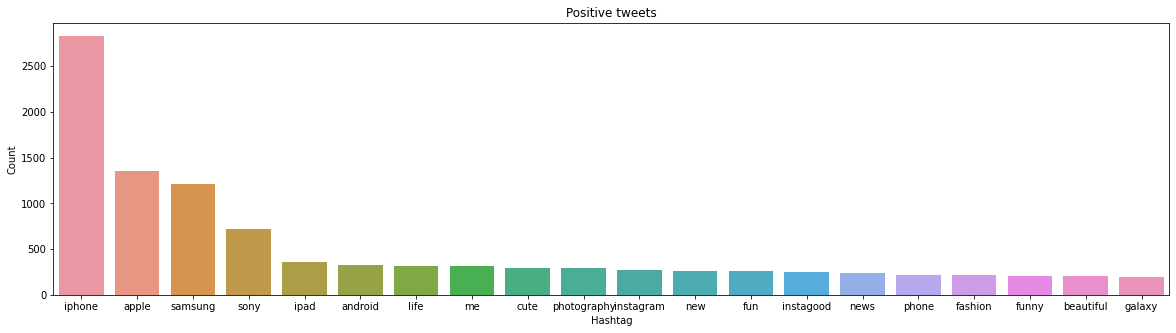

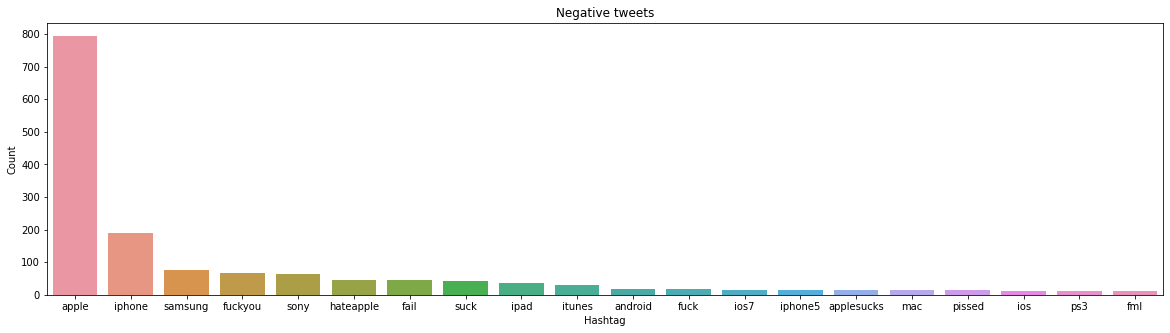

In [ ]:
print_hashtags()

In [ ]:
# remove 6 most frequent unrelatable word to positive or negative tweets
words = ["#apple", "#iphone", "#samsung", "#sony", "#ipad", "#android"]

for w in words:
  train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if not w in words]))
  test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if not w in words]))

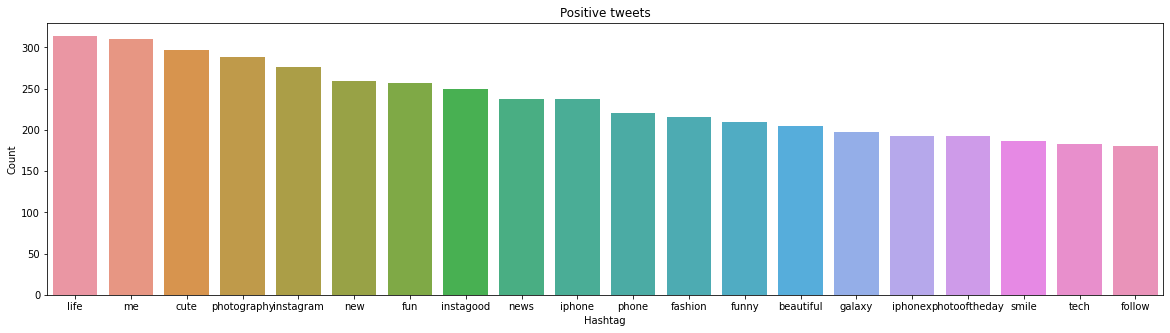

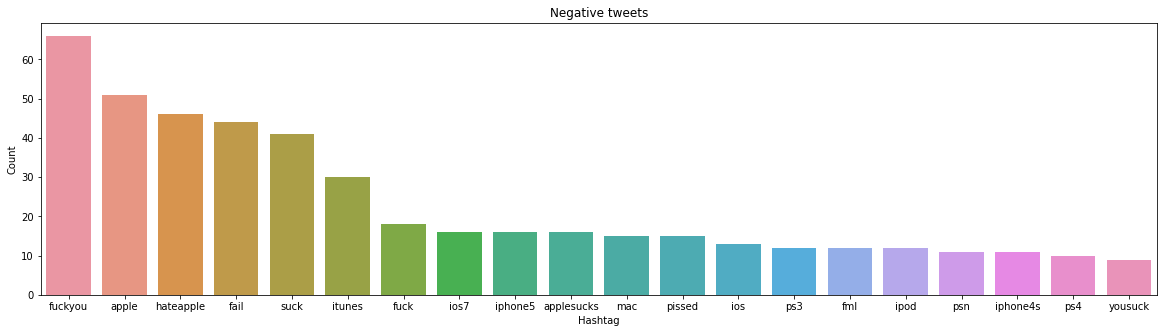

In [ ]:
# After removing hashtags
print_hashtags()

In [ ]:
# contraction corrector prerequisite
!pip install -q gensim
!sudo apt install openjdk-8-jdk
!sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!pip install -q language-check
!pip install -q pycontractions

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 MB of archives.
After this opera

In [ ]:
from pycontractions import Contractions
# Load your favorite word2vec model
cont = Contractions(api_key="glove-twitter-100")
#"glove-twitter-100" faadu
#"glove-twitter-200"

# optional, prevents loading on first expand_texts call
cont.load_models()

list(cont.expand_texts(["I'd like to know how I'd done that!",
                            "We're going to the zoo and I don't think I'll be home for dinner.",
                            "Theyre going to the zoo and she'll be home for dinner."]))

[============================================------] 89.8% 347.7/387.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


['I had like to know how I had done that!',
 'we are going to the zoo and I do not think I will be home for dinner.',
 'they are going to the zoo and she will be home for dinner.']

In [ ]:
# expand contractions
train_data['clean_tweet'] = list(cont.expand_texts(train_data['clean_tweet']))
test_data['clean_tweet'] = list(cont.expand_texts(test_data['clean_tweet']))

In [ ]:
# remove punctuations
#punctuation = '\"#$%&()*+-/:;<=>@[\\]^_`{|}~'
punctuation = '.,\'!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'             
train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: "".join(ch for ch in x if ch not in set(punctuation)))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: "".join(ch for ch in x if ch not in set(punctuation)))

In [ ]:
# remove the numbers

train_data['clean_tweet'] = train_data['clean_tweet'].str.replace("[0-9]", " ")
test_data['clean_tweet'] = test_data['clean_tweet'].str.replace("[0-9]", " ")

In [ ]:
# convert emojis to words
import _pickle as pickle
with open(save_path+ 'Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)
with open(save_path+ 'Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

def convert_emoticons_to_word(text):
    for emot in Emoticon_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoticon_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [ ]:
Emoticon_Dict

{'#‑\\)': 'Party all night',
 '%\\)': 'Drunk or confused',
 '%‑\\)': 'Drunk or confused',
 '0:3': 'Angel, saint or innocent',
 '0:\\)': 'Angel, saint or innocent',
 '0:‑3': 'Angel, saint or innocent',
 '0:‑\\)': 'Angel, saint or innocent',
 '0;\\^\\)': 'Angel, saint or innocent',
 '3:\\)': 'Evil or devilish',
 '3:‑\\)': 'Evil or devilish',
 '8-\\)': 'Happy face smiley',
 '8D': 'Laughing, big grin or laugh with glasses',
 '8‑0': 'Yawn',
 '8‑D': 'Laughing, big grin or laugh with glasses',
 ':#': 'Sealed lips or wearing braces or tongue-tied',
 ':###..': 'Being sick',
 ':$': 'Embarrassed or blushing',
 ':&': 'Sealed lips or wearing braces or tongue-tied',
 ":'\\(": 'Crying',
 ":'\\)": 'Tears of happiness',
 ":'‑\\(": 'Crying',
 ":'‑\\)": 'Tears of happiness',
 ':-###..': 'Being sick',
 ':-0': 'Shock',
 ':-3': 'Happy face smiley',
 ':->': 'Happy face smiley',
 ':-[.]': 'Skeptical, annoyed, undecided, uneasy or hesitant',
 ':-\\(': 'Frown, sad, andry or pouting',
 ':-\\)': 'Happy face smile

In [ ]:
train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: convert_emojis_to_word(x))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: convert_emojis_to_word(x))

train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: convert_emoticons_to_word(x))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: convert_emoticons_to_word(x))

In [ ]:
# remove white spaces

train_data['clean_tweet'] = train_data['clean_tweet'].apply(lambda x: ' '.join(x.split()))
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: ' '.join(x.split()))

In [ ]:
train_data

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #pregnancy test #apps #beautiful #cute #health #igers #iphoneonly #iphonesia
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case ^^ thanks to my uncle Happy_face_or_smiley #yay #xperia #s #sonyexperias…
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this! would you go? #talk #makememories #unplug #relax #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired i know I am george i was made that way Wink_or_smirk #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service! apple will not even talk to me about a question i have unless i pay them $19.95 for their stupid support!
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/,live out loud #lol #liveoutloud #selfie #smile #music #headphones
7916,7917,0,"We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…","we would like to wish you an amazing day! make every minute count #tls #today #accessories #news #life february 23, 2017 at 0…"
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!,helping my lovely 90 year old neighbor with her ipad this morning has just made me realise that 'i' do not actually need an i pad!
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/","finally got my #smart #pocket #wifi stay connected anytime,anywhere! and #s3 #gadget #"


In [ ]:
n = 6

In [ ]:
# save preprocess data
train_data.to_csv(save_path+ f'preprocess/train_data{n}.csv', header=True, index=False)
test_data.to_csv(save_path+ f'preprocess/test_data{n}.csv', header=True, index=False)

In [ ]:
# load preprocess data
train_data = pd.read_csv(save_path+ f'preprocess/train_data{n}.csv')
test_data = pd.read_csv(save_path+ f'preprocess/test_data{n}.csv')

### Visulualizing the cleaned tweets

In [ ]:
# Number of positive and negative fraction in training dataset
print(f"Number of training examples: {train_data.shape[0]}", '\n')
print(f"Number of test examples: {test_data.shape[0]}", '\n')

print(f"The fraction of positive and negative comments:")
print(train_data['label'].value_counts(normalize = True), '\n')

Number of training examples: 7920 

Number of test examples: 1953 

The fraction of positive and negative comments:
0    0.744192
1    0.255808
Name: label, dtype: float64 



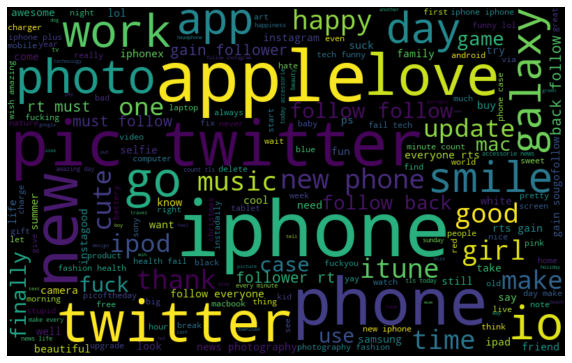

In [ ]:
# Let’s visualize all the words our data using the wordcloud plot.
all_words = ' '.join([text for text in train_data['clean_tweet']])

from wordcloud import WordCloud
wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

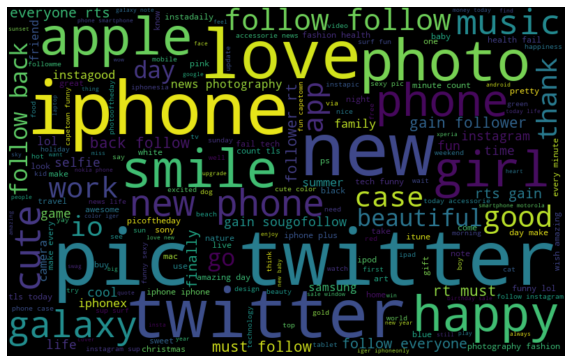

In [ ]:
# words in positive tweets
all_words = ' '.join([text for text in train_data['clean_tweet'][train_data['label']==0]])

from wordcloud import WordCloud
wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

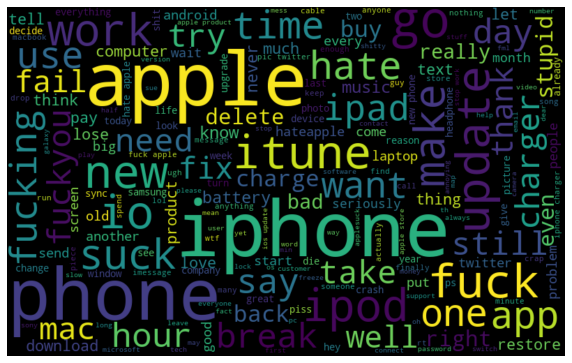

In [ ]:
# words in negative tweets
all_words = ' '.join([text for text in train_data['clean_tweet'][train_data['label']==1]])

from wordcloud import WordCloud
wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## bert model

In [4]:
# load preprocess data
n = 3
train_data = pd.read_csv(save_path+ f'preprocess/train_data{n}.csv')
test_data = pd.read_csv(save_path+ f'preprocess/test_data{n}.csv')

In [5]:
train_data.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #pregnancy test #apps #beautiful #cute #health #igers #iphoneonly #iphonesia
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case ^^ thanks to my uncle :) #yay #xperia #s #sonyexperias…
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this! would you go? #talk #makememories #unplug #relax #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired i know I am george i was made that way ;) #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service! apple will not even talk to me about a question i have unless i pay them $19.95 for their stupid support!


In [6]:
# !pip install -q tensorflow
# !pip install -q tensorflow_hub
!pip install -q bert-for-tf2

     |████████████████████████████████| 40kB 2.5MB/s 


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import bert
import re
import pickle

### bert input data pipeline

In [8]:
# import bert_layer

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)

In [9]:
# save layer weights
bert_layer_weights = bert_layer.get_weights()

# set layer weights
bert_layer.set_weights(bert_layer_weights)

In [10]:
# build tokenizer function

def get_tokenizer():
  FullTokenizer = bert.bert_tokenization.FullTokenizer
  vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
  do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()# True
  tokenizer = FullTokenizer(vocab_file, do_lower_case)
  return tokenizer

tokenizer = get_tokenizer()

In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
# example of tokenization
token = tokenizer.tokenize("#$&*#")
print(token)
print(tokenizer.convert_tokens_to_ids(token))

['#', '$', '&', '*', '#']
[1001, 1002, 1004, 1008, 1001]


In [ ]:
# Classification and Separator token
# classification token is used at the start 
# separator token is used if have more than one sentence
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

In [11]:
# function for input preprocessing for bert model
def encode_sentence(s, tokenizer):
  # add separator token and tokenize
  token = tokenizer.tokenize(s)
  token = token + ['[SEP]']
  return tokenizer.convert_tokens_to_ids(token)

def bert_input_and_output(df, tokenizer):
  sentence = tf.ragged.constant([encode_sentence(s, tokenizer) for s in df['clean_tweet']])
  
  # add classification token
  num_examples = len(df['clean_tweet'])
  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])] * num_examples

  input_word_ids = tf.concat([cls, sentence], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  type_cls = tf.zeros_like(cls)
  type_sentence = tf.zeros_like(sentence)
  input_type_ids = tf.concat([type_cls, type_sentence], axis = -1).to_tensor()

  inputs = {
      'input_word_ids' : input_word_ids.to_tensor(),
      'input_mask' : input_mask,
      'input_type_ids' : input_type_ids
  }
  # inputs = [input_word_ids.to_tensor(), input_mask, input_type_ids]
  if 'label' in df.columns:
    output = tf.constant(df['label'].values)
    return inputs, output
  return inputs

In [12]:
# split data into training and validation set
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(train_data, stratify = train_data['label'], test_size = 0.2, random_state = 12)

#df_train1, df_train2 = train_test_split(df_train, stratify = df_train['label'], test_size = 0.4, random_state = 12)
#df_train = train_data
df_test = test_data

df_train.shape, df_val.shape, df_test.shape

((6336, 4), (1584, 4), (1953, 3))

In [13]:
# model input and output
train_input, train_label = bert_input_and_output(df_train, tokenizer)

# train_input1, train_label1 = bert_input_and_output(df_train1, tokenizer)
# train_input2, train_label2 = bert_input_and_output(df_train2, tokenizer)

val_input, val_label = bert_input_and_output(df_val, tokenizer)

test_input = bert_input_and_output(df_test, tokenizer)

In [14]:
for key, value in test_input.items():
  print(f'{key:15} --> {value.shape}')

print(train_label.shape)

input_word_ids  --> (1953, 100)
input_mask      --> (1953, 100)
input_type_ids  --> (1953, 100)
(6336,)


### gru model

#### Saving and Loading fine-tune BERT layer weights

In [ ]:
# get weights out of bert layer
best_bert_layer_weights = bert_layer.get_weights()

In [ ]:
# save bert layer weights
with open(save_path + 'best_bert_layer_weights1.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(best_bert_layer_weights, filehandle)

In [ ]:
# load bert layer weights
with open(save_path + 'best_bert_layer_weights.data', 'rb') as filehandle:
    # read the data as binary data stream
    best_bert_layer_weights = pickle.load(filehandle)

In [ ]:
# set best weights.
bert_layer.set_weights(best_bert_layer_weights)

#### Build classification model to finetune BERT layer

In [29]:
# Building architecture of model

def bert_model(max_seq_length = None):
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
  x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=8, dropout=0.3))(sequence_output)
  x = tf.keras.layers.Dense(units=2, activation='softmax')(x)
  model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=[x])
  return model

In [30]:
# bert model
max_seq_length = None
bert_clf = bert_model(max_seq_length = max_seq_length)
bert_clf.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [31]:
# Check model is working.
try_batch = {key: value[:10] for key, value in train_input.items()}

bert_clf(try_batch).numpy()

array([[0.3166555 , 0.6833445 ],
       [0.4543518 , 0.5456482 ],
       [0.24299929, 0.7570007 ],
       [0.6229401 , 0.37705988],
       [0.37010893, 0.62989104],
       [0.24852812, 0.7514718 ],
       [0.25517088, 0.7448291 ],
       [0.28901145, 0.7109885 ],
       [0.31801412, 0.6819859 ],
       [0.532984  , 0.467016  ]], dtype=float32)

In [32]:
callback1 = tf.keras.callbacks.ModelCheckpoint(
    "/content/bert_clf_checkpoint/checkpoint_best", monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch'
)

callback2 = tf.keras.callbacks.ModelCheckpoint(
    "/content/bert_clf_checkpoint/checkpoint_regular", monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=True, mode='auto', save_freq='epoch'
)

In [33]:
#lr = 2e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy', dtype=tf.float32)]
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

bert_clf.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
# fine tune bert layer and saved the weights as best_bert_layer_weights.
history = bert_clf.fit(train_input, train_label, epochs = 3, batch_size = 32,
                       validation_data = (val_input, val_label), callbacks=[callback1, callback2])
# 0.9103348797246118.

Epoch 1/3
198/198 [==============================] - 302s 2s/step - loss: 0.4245 - accuracy: 0.8840 - val_loss: 0.4015 - val_accuracy: 0.9091
Epoch 2/3
198/198 [==============================] - 300s 2s/step - loss: 0.3804 - accuracy: 0.9306 - val_loss: 0.4013 - val_accuracy: 0.9091
Epoch 3/3
198/198 [==============================] - 301s 2s/step - loss: 0.3609 - accuracy: 0.9528 - val_loss: 0.3934 - val_accuracy: 0.9198


In [ ]:
bert_layer.trainable = False
bert_layer.trainable

False

Save the BERT layer weights and reinitiate the weights

In [ ]:
# Classification model
# fixed bert layer with bidirectional layer (with dropout 0.3 in gru layer(units=8))
history = bert_clf.fit(train_input, train_label, epochs = 3, batch_size = 32,
                       validation_data = (val_input, val_label), callbacks=[callback1, callback2])
# Your score for this submission is : 0.917505840298365. top notch

Epoch 1/3
198/198 [==============================] - 119s 603ms/step - loss: 0.5807 - accuracy: 0.7402 - val_loss: 0.4488 - val_accuracy: 0.9129
Epoch 2/3
198/198 [==============================] - 117s 593ms/step - loss: 0.4095 - accuracy: 0.9522 - val_loss: 0.4125 - val_accuracy: 0.9160
Epoch 3/3
198/198 [==============================] - 118s 597ms/step - loss: 0.3806 - accuracy: 0.9596 - val_loss: 0.4035 - val_accuracy: 0.9179


### prediction

In [38]:
#bert_clf.load_weights("/content/bert_clf_checkpoint/checkpoint_best")

bert_clf.load_weights("/content/bert_clf_checkpoint/checkpoint_best")

In [39]:
pred = bert_clf.predict(test_input)

In [40]:
predictions = tf.argmax(pred, axis = -1)

In [41]:
# prepare submission dataframe
sub = pd.DataFrame({'id':df_test['id'], 'label':predictions.numpy()})

# write predictions to a CSV file
sub.to_csv("/content/sub_bert.csv", index=False)